# Optical character recognition (ORC)-easyorc
* Is the electronic or mechanical conversion of images of typed, handwritten or printed text into machine-encoded text, whether from a scanned document, a photo of a document, a scene-photo

### Structure
* we are going to detect text from images using easyorc which are in the folder `images`
* dispalay the images using matplotlib
* drawing bounding boxes using opencv

## Istallation
* to use easyorc we need to install it as follows

In [1]:
!pip install easyocr

  Using cached opencv_python-4.5.1.48-cp38-cp38-win_amd64.whl (34.9 MB)


## Imports Of required packages
* we are going to use the following packages 
    * matplotlib
    * easyorc
    * cv2

In [2]:
import cv2
from matplotlib import pyplot as plt
import easyocr as ocr

In [3]:
# All the images that are in the images folder

images = [f'images/{str(i+1)}.png' for i in range(4)]
images

['images/1.png', 'images/2.png', 'images/3.png', 'images/4.png']

In [ ]:
### Basic OCR from an image path

In [7]:
reader = ocr.Reader(["ch_sim", "en"], gpu=False)
results = reader.readtext(images[0])
results # results will be an array of detection

Using CPU. Note: This module is much faster with a GPU.


[([[20, 380], [244, 380], [244, 430], [20, 430]],
  'Make Odd',
  0.8496842257580434),
 ([[19, 453], [95, 453], [95, 493], [19, 493]], 'YoU', 0.9770687347181095),
 ([[106, 460], [170, 460], [170, 492], [106, 492]], 'are', 0.9218642711639404),
 ([[176, 452], [286, 452], [286, 502], [176, 502]],
  'given',
  0.9967484620830299),
 ([[293, 459], [457, 459], [457, 501], [293, 501]],
  'an array',
  0.7989506289009513),
 ([[457, 442], [1049, 442], [1049, 505], [457, 505]],
  'consisting of positive integers。',
  0.5998779642379315),
 ([[21, 505], [95, 505], [95, 545], [21, 545]], 'YoU', 0.928697314064624),
 ([[109, 501], [207, 501], [207, 545], [109, 545]],
  'need',
  0.9922178387641907),
 ([[219, 505], [265, 505], [265, 545], [219, 545]], 't0', 0.7645442088961399),
 ([[281, 505], [387, 505], [387, 545], [281, 545]],
  'make',
  0.9797182083129883),
 ([[401, 501], [531, 501], [531, 545], [401, 545]],
  'all the',
  0.937250093798777),
 ([[547, 501], [807, 501], [807, 545], [547, 545]],
  'n

> **We passsed `gpu=False`** because we are working on a cpu of which the model is faster on GPUs

> `reader = ocr.Reader(['ch_sim','en'])` is for loading model into memory. It takes some time but it need to be run only once.

> Instead of passing **`images[0]`** we can pass opencv image object which is a numpy array

> **`detail = 0`** is used for simpler output.

In [9]:
results = reader.readtext(images[0], detail = 0)
results # this will return only the text on the image

['Make Odd',
 'YoU',
 'are',
 'given',
 'an array',
 'consisting of positive integers。',
 'YoU',
 'need',
 't0',
 'make',
 'all the',
 'numbers odd',
 'i',
 'minimum',
 'number of steps。',
 'For this yoU',
 'Can Select',
 'a number',
 "a'",
 'from the array and divide all its occurrences by 2',
 'Find',
 'the minimum number of steps。']

In [ ]:
#### Example: Visualise and see the images and text returned from images

['Example', 'Input', '6', '406403201', 'Output', '4']


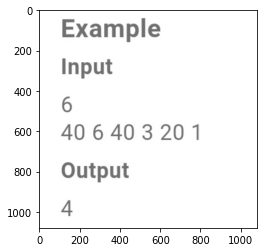

In [36]:
image = cv2.imread(images[1])
imageDrawing = image.copy()
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = reader.readtext(images[1], detail=0)
print(results)
plt.imshow(imageRGB)
plt.show()

# Drawing a rectangle on each text Detected and visualise it
* we don't need to pass `detail=0` in our case since we also want to get the coodinates of the detected text so that we can draw a rectangle around it.


In [39]:
results = reader.readtext(images[1])

[[101, 27], [618, 27], [618, 174], [101, 174]] Example
[[96, 227], [383, 227], [383, 354], [96, 354]] Input
[[107, 427], [171, 427], [171, 511], [107, 511]] 6
[[102, 554], [806, 554], [806, 656], [102, 656]] 406403201
[[97, 737], [466, 737], [466, 870], [97, 870]] Output
[[107, 939], [173, 939], [173, 1021], [107, 1021]] 4


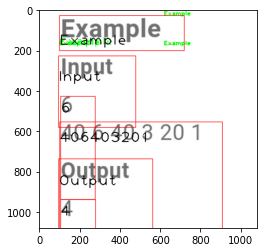

In [62]:

for result in results:
    coodinates = result[0]
    text = result[1]
    print(coodinates, text)
    
    w, h = coodinates[0][0]+coodinates[2][0], coodinates[0][1]+coodinates[2][1]

    imageDrawing = cv2.rectangle(imageDrawing,tuple(coodinates[0]), (w,h), (255, 0, 0), 2)
    imageDrawing = cv2.putText(imageDrawing,text, tuple(coodinates[3]),cv2.FONT_HERSHEY_PLAIN,5, (0, 0, 0), 4)

plt.imshow(imageDrawing)
plt.show()

### Basic OCR from an opencv numpy array

In [66]:
image = cv2.imread(images[1])
imageDrawing = image.copy()
results = reader.readtext(image, detail=0)
results

['Example', 'Input', '6', '406403201', 'Output', '4']

In [67]:
results = reader.readtext(image)
results[0]

([[101, 27], [618, 27], [618, 174], [101, 174]], 'Example', 0.8987835330103122)

[[101, 27], [618, 27], [618, 174], [101, 174]] Example
[[96, 227], [383, 227], [383, 354], [96, 354]] Input
[[107, 427], [171, 427], [171, 511], [107, 511]] 6
[[102, 554], [806, 554], [806, 656], [102, 656]] 406403201
[[97, 737], [466, 737], [466, 870], [97, 870]] Output
[[107, 939], [173, 939], [173, 1021], [107, 1021]] 4


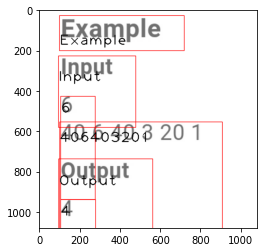

In [68]:
for result in results:
    coodinates = result[0]
    text = result[1]
    print(coodinates, text)
    
    w, h = coodinates[0][0]+coodinates[2][0], coodinates[0][1]+coodinates[2][1]

    imageDrawing = cv2.rectangle(imageDrawing,tuple(coodinates[0]), (w,h), (255, 0, 0), 2)
    imageDrawing = cv2.putText(imageDrawing,text, tuple(coodinates[3]),cv2.FONT_HERSHEY_PLAIN,5, (0, 0, 0), 4)

plt.imshow(imageDrawing)
plt.show()

### Reading Paragraphs

In [79]:

reader = ocr.Reader(["en"], gpu=False, download_enabled=False)
results = reader.readtext(images[0], paragraph=True, min_size=10)


Using CPU. Note: This module is much faster with a GPU.


In [80]:
results[0][1]

"Make Odd You are given an array consisting of positive integers. You need to make all the numbers odd in minimum number of steps: For this you can select a number [ a' from the array and divide all it's occurrences by 2. Find the minimum number of steps:"

## Documentation Reference
* [Github](https://github.com/JaidedAI/EasyOCR)
* [API Docs](https://www.jaided.ai/easyocr/documentation/)
* [Suppoted Languages](https://www.jaided.ai/easyocr/)